In [ ]:
# 데이터 받아와서
# matplotlib, seaborn, 지도(folium)위에 시각화 해보기

In [ ]:
!pip install googlemaps
!pip install folium

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40711 sha256=fda493bd62a054b35288c0cb029293f8521cc8372e14aabf61edec4c314f4e48
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [ ]:
import pandas as pd

# 서울시 병원 data 가져오기
df = pd.read_csv('/content/서울시_병원정보.csv', encoding='cp949', low_memory=False)
print(df.columns)

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '시도', '도로명시도', '소재지시도'],
      dtype='object')


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,364 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and dire

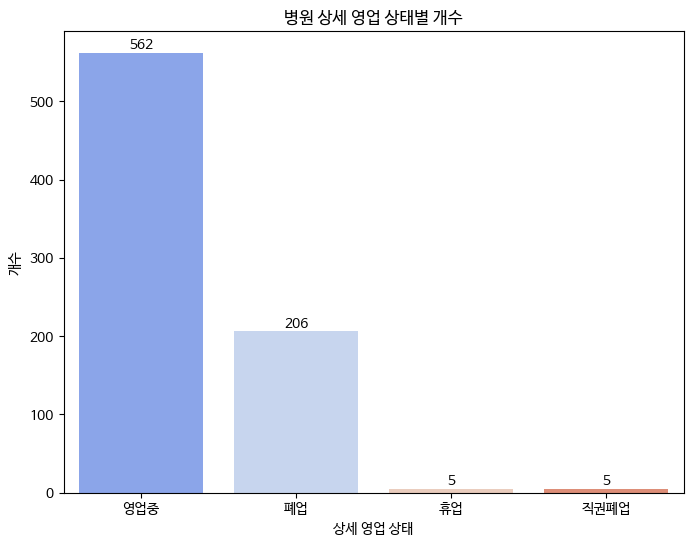

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

counts = df['상세영업상태명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['상세영업상태명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('병원 상세 영업 상태별 개수')
plt.xlabel('상세 영업 상태')
plt.ylabel('개수')
plt.show()

In [ ]:
# 병원 종류 살펴보기
print(df['의료기관종별명'].value_counts(), '\n')

# 진료과목 null값 확인
print("진료과목내용명 null 개수:", df['진료과목내용명'].isnull().sum(), '\n')

# 소아청소년과 병원 영업 상태 확인
re = df[(df['의료기관종별명'].isin(['병원', '한방병원', '종합병원'])) & (df['진료과목내용명'].str.contains('소아청소년과'))]
print(re['상세영업상태명'].value_counts(), '\n')

# 영업중인 소아청소년과 병원 정보만 남기기
re = re[re['상세영업상태명'] == '영업중']

re

병원                 324
요양병원(일반요양병원)       172
한방병원               112
치과병원               105
종합병원                58
요양병원(노인병원)           4
요양병원(정신병원)           2
요양병원(장애인의료재활시설)      1
Name: 의료기관종별명, dtype: int64 

진료과목내용명 null 개수: 0 

영업중     123
폐업       29
휴업        1
직권폐업      1
Name: 상세영업상태명, dtype: int64 



,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,완화의료담당부서명,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자,시도,도로명시도,소재지시도
211,2770,병원,01_01_01_P,3060000,PHMA219833060034021200004,1983-08-22,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시
213,2772,병원,01_01_01_P,3060000,PHMA220023060034021200020,2002-10-25,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시
214,2773,병원,01_01_01_P,3060000,PHMA220033060034021200027,1900-01-01,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN
216,2775,병원,01_01_01_P,3060000,PHMA220083060034021200008,2008-04-04,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN
218,2777,병원,01_01_01_P,3060000,PHMA220083060034021200023,2008-09-01,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,6739,병원,01_01_01_P,3120000,PHMA218853120033021200001,1974-03-25,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN
750,6746,병원,01_01_01_P,3180000,PHMA220133180034021200001,2013-11-07,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,NaN
752,6753,병원,01_01_01_P,3150000,PHMA220183150037021200002,2018-12-26,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시
766,6821,병원,01_01_01_P,3050000,PHMA220223050034021200001,2022-05-26,NaN,1,영업/정상,13,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,서울특별시,서울특별시,서울특별시


In [ ]:
import requests
import folium

def get_coordinates(api_key, address):
    # 구글 맵 API를 통한 주소 검색
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={api_key}"
    response = requests.get(url)
    data = response.json()

    # 결과가 있는 경우 위도와 경도 반환
    if data['status'] == 'OK':
        location = data['results'][0]['geometry']['location']
        lat, lng = location['lat'], location['lng']
        return lat, lng
    else:
        print(f"Failed to get coordinates for address: {address}")
        return None, None

# 지도 생성
map = folium.Map(location=[37.5502, 126.982], zoom_start=12)

In [ ]:
# 주소 목록을 순회하면서 위도와 경도를 구하고 지도에 마커 추가
for i in re.index:
    address = re['도로명전체주소'][i]
    lat, lng = get_coordinates(google_api_key, address)
    if lat is not None and lng is not None:
        folium.Marker([lat, lng], popup=folium.Popup(re['사업장명'][i], max_width=300)).add_to(map)

# 지도 표시
map

# 자취구별로 끊어서 저장하고 자치구에 CircleMarker 추가

In [ ]:
list_ = ['구로구' '중랑구' '중구' '양천구' '용산구' '은평구' '서초구' '송파구' '성동구' '종로구' '영등포구' '강남구'
 '금천구' '마포구' '광진구' '서대문구' '성북구' '동대문구' '강동구' '강서구' '동작구' '도봉구' '강북구' '관악구'
 '노원구']

In [ ]:
# 의원 데이터의 시군구명 구하기
print(len(re))

123


In [ ]:
re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   번호         0 non-null      int64  
 1   개방서비스명     0 non-null      object 
 2   개방서비스아이디   0 non-null      object 
 3   개방자치단체코드   0 non-null      int64  
 4   관리번호       0 non-null      object 
 5   인허가일자      0 non-null      object 
 6   인허가취소일자    0 non-null      float64
 7   영업상태구분코드   0 non-null      int64  
 8   영업상태명      0 non-null      object 
 9   상세영업상태코드   0 non-null      int64  
 10  상세영업상태명    0 non-null      object 
 11  폐업일자       0 non-null      object 
 12  휴업시작일자     0 non-null      object 
 13  휴업종료일자     0 non-null      object 
 14  재개업일자      0 non-null      float64
 15  소재지전화      0 non-null      object 
 16  소재지면적      0 non-null      float64
 17  소재지우편번호    0 non-null      object 
 18  소재지전체주소    0 non-null      object 
 19  도로명전체주소    0 non-null      object 
 20  도로명우편번호    0 non-null 

# 미성년자인구수

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
# font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
# plt.rc('font', family=font_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

NameError: ignored

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='NanumBarunGothic')

In [2]:
population = pd.read_csv("SMG_01_20221107_C_001.csv")
population

,년도,행정구역읍면동코드,행정구역읍면동명,노인인구수,노인인구증감율,미성년자인구수,미성년자인구증감율,여자인구수,여자인구수증감율
0,2012,11,서울특별시,1105583,5.82,1972496,-3.32,5153982,-0.42
1,2012,11110,종로구,23730,4.08,28129,-5.33,82933,-1.80
2,2012,1111051500,청운효자동,2074,3.60,3344,-3.66,7826,-0.63
3,2012,1111053000,사직동,1602,2.96,1655,-2.36,5372,-1.41
4,2012,1111054000,삼청동,615,2.33,542,-3.21,1738,-1.92
...,...,...,...,...,...,...,...,...,...
4495,2021,1174065000,성내제2동,4355,3.32,2105,-9.70,11920,-3.71
4496,2021,1174066000,성내제3동,3844,3.92,2864,-6.53,11753,-1.17
4497,2021,1174068500,길동,7983,4.03,5142,-7.83,23354,-2.08
4498,2021,1174069000,둔촌제1동,38,-60.42,9,-10.00,58,-55.73


In [3]:
population.isna().sum()

년도            0
행정구역읍면동코드     0
행정구역읍면동명      0
노인인구수         0
노인인구증감율      15
미성년자인구수       0
미성년자인구증감율    15
여자인구수         0
여자인구수증감율     15
dtype: int64

In [4]:
population:pd.DataFrame = population[['년도', '행정구역읍면동명', '미성년자인구수']]
population

,년도,행정구역읍면동명,미성년자인구수
0,2012,서울특별시,1972496
1,2012,종로구,28129
2,2012,청운효자동,3344
3,2012,사직동,1655
4,2012,삼청동,542
...,...,...,...
4495,2021,성내제2동,2105
4496,2021,성내제3동,2864
4497,2021,길동,5142
4498,2021,둔촌제1동,9


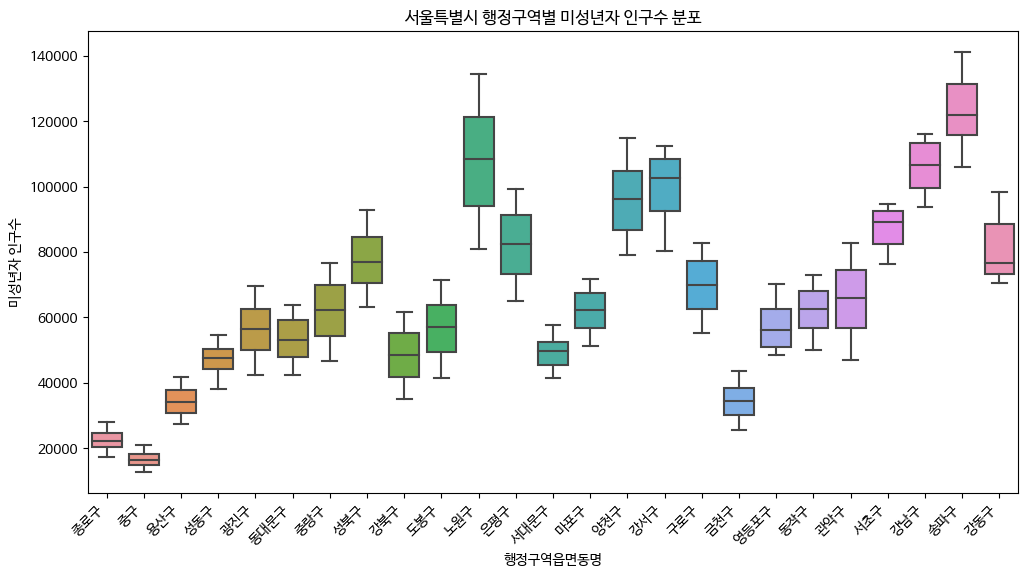

In [5]:
# 서울특별시의 행정구역을 뽑기
df = population[population['행정구역읍면동명'].str.match('.*구$')]

# 서울 행정구역의 미성년자 인구수에 대한 EDA
plt.figure(figsize=(12, 6))
sns.boxplot(x='행정구역읍면동명', y='미성년자인구수', data=df)
plt.title('서울특별시 행정구역별 미성년자 인구수 분포')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

# 서울 행정구역의 미성년자 인구수 통계 정보
seoul_summary = df.groupby('행정구역읍면동명')['미성년자인구수'].describe()

In [6]:
seoul_list = [['구로구', '중랑구', '중구', '양천구', '용산구', '은평구', '서초구', '송파구', '성동구', '종로구', '영등포구', '강남구', '금천구', '마포구', '광진구', '서대문구', '성북구', '동대문구', '강동구', '강서구', '동작구', '도봉구', '강북구', '관악구', '노원구']]
seoul_list

[['구로구',
  '중랑구',
  '중구',
  '양천구',
  '용산구',
  '은평구',
  '서초구',
  '송파구',
  '성동구',
  '종로구',
  '영등포구',
  '강남구',
  '금천구',
  '마포구',
  '광진구',
  '서대문구',
  '성북구',
  '동대문구',
  '강동구',
  '강서구',
  '동작구',
  '도봉구',
  '강북구',
  '관악구',
  '노원구']]

In [43]:
df = population.loc[(population['행정구역읍면동명'].isin(seoul_list[0])) & (population['년도'] == 2021)]
df

,년도,행정구역읍면동명,미성년자인구수
4049,2021,종로구,17365
4067,2021,중구,12773
4083,2021,용산구,27345
4100,2021,성동구,38125
4118,2021,광진구,42518
4134,2021,동대문구,42357
4149,2021,중랑구,46717
4166,2021,성북구,63312
4187,2021,강북구,34944
4201,2021,도봉구,41355


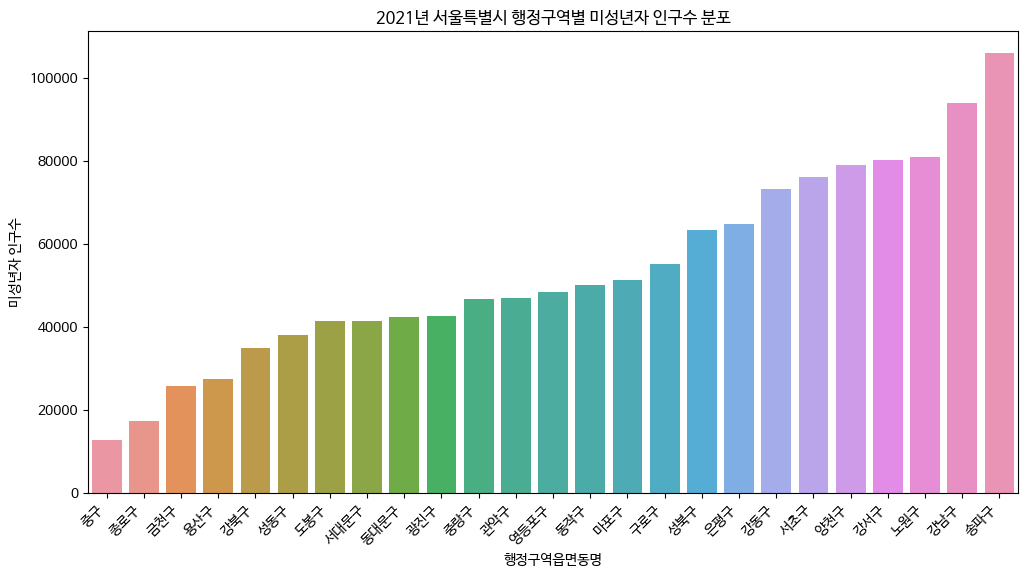

In [44]:
sort_df = df.sort_values(by='미성년자인구수')

plt.figure(figsize=(12, 6))
sns.barplot(x='행정구역읍면동명', y='미성년자인구수', data=sort_df)
plt.title('2021년 서울특별시 행정구역별 미성년자 인구수 분포')
plt.xlabel('행정구역읍면동명')
plt.ylabel('미성년자 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
# 위도, 경도 추가하기

In [9]:
!pip install googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40711 sha256=ab378959af48ec381aa6ada5fe5a70bb1fccf8244a6e4f5b10e84ab2663b9d9c
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [45]:
import googlemaps
import pandas as pd
from tqdm import tqdm

# API키 입력
mykey = google_api_key
maps = googlemaps.Client(key=mykey)  # my key값 입력

# 위도,경도 변환하는 함수 생성
def trans_geo(addr):
    try:
        geo_location = maps.geocode(addr)[0].get('geometry')
        lat = geo_location['location']['lat']
        lng =  geo_location['location']['lng']
        return [lat,lng]
    except:
        return [0,0]

# 실행
for idx in df.index:
    addr = df.loc[idx, '행정구역읍면동명']
    df.loc[idx,'latitude'] = trans_geo(addr)[0]
    df.loc[idx,'longitude'] = trans_geo(addr)[1]

<ipython-input-45-c0b4b186b619>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[idx,'latitude'] = trans_geo(addr)[0]
<ipython-input-45-c0b4b186b619>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[idx,'longitude'] = trans_geo(addr)[1]


In [46]:
df

,년도,행정구역읍면동명,미성년자인구수,latitude,longitude
4049,2021,종로구,17365,37.594916,126.977339
4067,2021,중구,12773,37.560144,126.995965
4083,2021,용산구,27345,37.531380,126.979884
4100,2021,성동구,38125,37.551017,127.041039
4118,2021,광진구,42518,37.546728,127.085754
4134,2021,동대문구,42357,37.581956,127.054846
4149,2021,중랑구,46717,37.597814,127.092893
4166,2021,성북구,63312,37.605699,127.017566
4187,2021,강북구,34944,37.643480,127.011184
4201,2021,도봉구,41355,37.669107,127.032353


In [52]:
import pandas as pd
import folium
import webbrowser

In [63]:
# 지도의 중심 위치 설정
center = [37.5665, 126.9780]

# Folium 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 데이터 포인트를 순회하면서 원으로 표시
for index, row in df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    population = row['미성년자인구수']

    # CircleMarker를 사용하여 원 표시
    folium.CircleMarker(
        location=[lat, lon],
        radius=population/2000,  # 원의 반지름 설정 (인구수에 따라 크기 조절)
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map)

map

In [64]:
# 지도를 HTML 파일로 저장
map.save('map.html')
